# Playlist Dataset's Exploratory Data Analyses

This notebook presents an exploratory data analysis of a Brazilian music (MPB) playlist dataset.

It will analyze various aspects of the data including song distribution, artists, albums, and temporal patterns.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
plt.style.use('default') 
sns.set_theme(style="whitegrid") 
pd.set_option('display.max_columns', None)

In [3]:
# Load the dataset
df = pd.read_csv('dataset/playlist_metadata.csv')

# Show the first lines of the dataset
print("First lines of the dataset:")
display(df.head())

First lines of the dataset:


,Track Name,Artist,Album,Release Date,Spotify Duration (ms),Spotify Track URL,YouTube Original Video URL,Original Duration,YouTube Piano Solo Video URL,Piano Solo Duration
0,Velha Infância - 2004 Digital Remaster,Tribalistas,Tribalistas,01/01/2002,250440,https://open.spotify.com/track/1mSxbLW7fKABfeY...,https://www.youtube.com/watch?v=iyJDuJggiEM,251000,https://www.youtube.com/watch?v=YcOyefoJec0,146000.0
1,Trem-Bala,Ana Vilela,Trem-Bala,12/05/2017,180319,https://open.spotify.com/track/05QeyKGAn4TZrv4...,https://www.youtube.com/watch?v=sWhy1VcvvgY,181000,https://www.youtube.com/watch?v=-OswZiQeXgc,60000.0
2,Aliança,Tribalistas,Tribalistas,2017,237421,https://open.spotify.com/track/1DLKuppSYytOuxh...,https://www.youtube.com/watch?v=3JiMr-HgHJ8,251000,https://www.youtube.com/watch?v=I1kwd-UDuec,227000.0
3,O Que É O Que É?,Gonzaguinha,Caminhos Do Coração,13/08/1982,258986,https://open.spotify.com/track/2CoKGyZavJWTFUP...,https://www.youtube.com/watch?v=IYZcsb706q8,261000,https://www.youtube.com/watch?v=CruT6LdL-Uc,219000.0
4,A Banda,Chico Buarque,Chico Buarque de Hollanda,01/01/1966,131000,https://open.spotify.com/track/6wUp7y502iyWLuL...,https://www.youtube.com/watch?v=WZWcpEgJZAY,132000,https://www.youtube.com/watch?v=8Ba1_LfcFR0,61000.0


In [4]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Track Name                    941 non-null    object 
 1   Artist                        941 non-null    object 
 2   Album                         941 non-null    object 
 3   Release Date                  941 non-null    object 
 4   Spotify Duration (ms)         941 non-null    int64  
 5   Spotify Track URL             941 non-null    object 
 6   YouTube Original Video URL    941 non-null    object 
 7   Original Duration             941 non-null    int64  
 8   YouTube Piano Solo Video URL  510 non-null    object 
 9   Piano Solo Duration           510 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 73.6+ KB


In [5]:
# Descriptive statistics
display(df.describe())

,Spotify Duration (ms),Original Duration,Piano Solo Duration
count,941.000000,9.410000e+02,5.100000e+02
mean,229763.980871,2.432795e+05,1.945098e+05
std,60581.201821,1.986572e+05,1.243436e+05
min,18373.000000,6.000000e+04,6.000000e+04
25%,190133.000000,1.920000e+05,1.370000e+05
50%,225200.000000,2.290000e+05,1.815000e+05
75%,260346.000000,2.680000e+05,2.330000e+05
max,617041.000000,5.583000e+06,1.861000e+06


In [6]:
# General statistics
print(f"Total of songs: {len(df)}")
print(f"Total of unique artists: {df['Artist'].nunique()}")
print(f"Total of unique albums: {df['Album'].nunique()}")

Total of songs: 941
Total of unique artists: 189
Total of unique albums: 595


In [7]:
# Checking for null values
display(df.isnull().sum())

Track Name                        0
Artist                            0
Album                             0
Release Date                      0
Spotify Duration (ms)             0
Spotify Track URL                 0
YouTube Original Video URL        0
Original Duration                 0
YouTube Piano Solo Video URL    431
Piano Solo Duration             431
dtype: int64

In [8]:
# Dropping rows with null values in 'YouTube Piano Solo Video URL' and 'Piano Solo Duration'
df = df.dropna(subset=['YouTube Piano Solo Video URL', 'Piano Solo Duration'])
len(df)

510

Chico Buarque        37
Caetano Veloso       36
Djavan               25
ANAVITÓRIA           22
Milton Nascimento    19
Marisa Monte         19
Gilberto Gil         17
Gal Costa            14
Elis Regina          14
Maria Bethânia       12
Name: Artist, dtype: int64

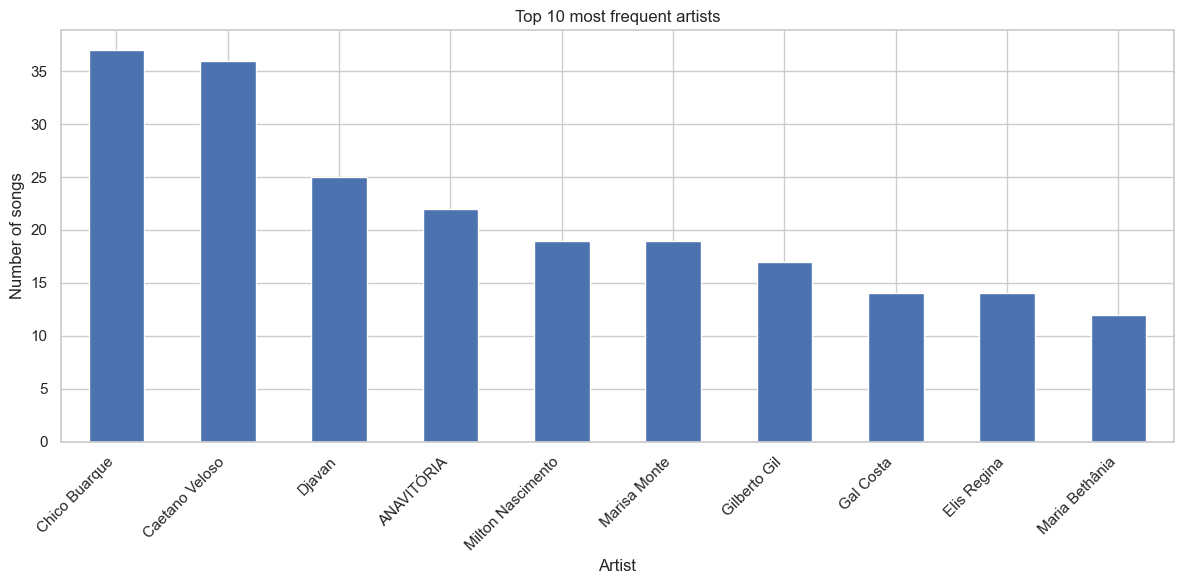

In [9]:
# Artists analysis
display(df['Artist'].value_counts().head(10))

# Visualization of the most frequent artists
plt.figure(figsize=(12, 6))
df['Artist'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 most frequent artists')
plt.xlabel('Artist')
plt.ylabel('Number of songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/2l/dw3h_m3n5_x9ljsn9qdpxf4h0000gn/T/ipykernel_99592/3445717295.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


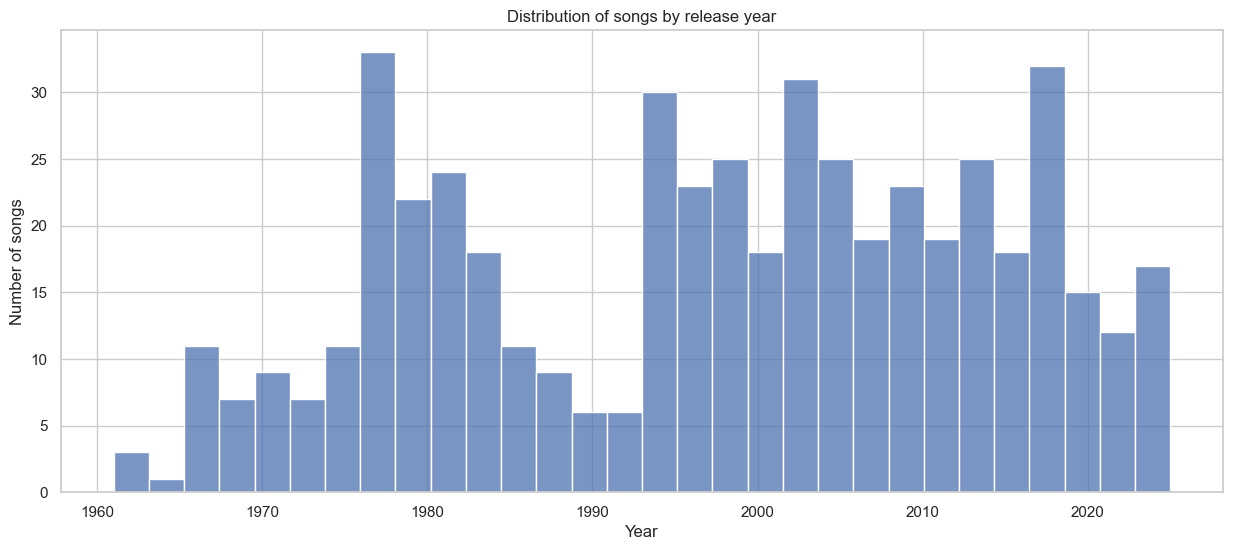


Period covered: from 1961 to 2025


In [10]:
# Temporal analysis
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Year'] = df['Release Date'].dt.year

plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Year', bins=30)
plt.title('Distribution of songs by release year')
plt.xlabel('Year')
plt.ylabel('Number of songs')
plt.grid(True)
plt.show()

print(f"\nPeriod covered: from {df['Year'].min()} to {df['Year'].max()}")

In [11]:
# Songs by decade
df['Decade'] = (df['Year'] // 10) * 10
display(df['Decade'].value_counts().sort_index())

1960     22
1970     72
1980     77
1990     85
2000    108
2010    113
2020     33
Name: Decade, dtype: int64

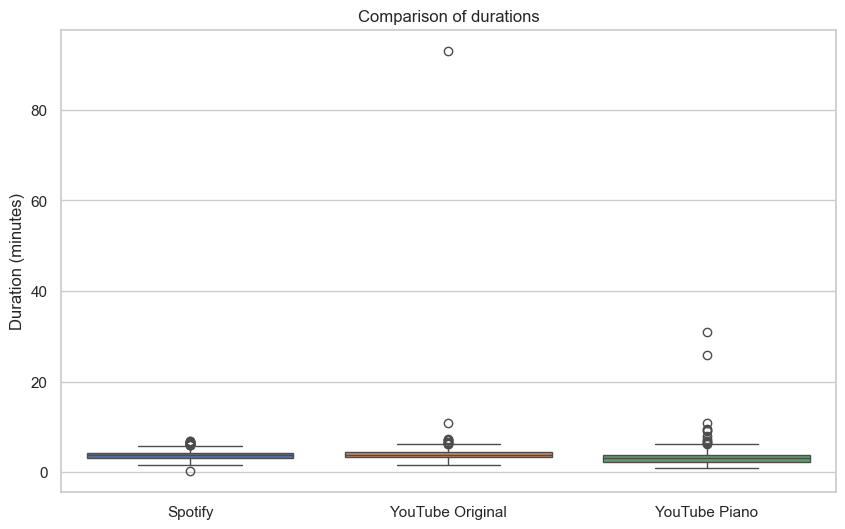

In [12]:
# Duration analysis
# Convert durations to minutes
df['Spotify Duration (min)'] = df['Spotify Duration (ms)'] / 60000
df['Original Duration (min)'] = df['Original Duration'] / 60000
df['Piano Duration (min)'] = df['Piano Solo Duration'] / 60000

# Comparison of durations
duration_comparison = pd.DataFrame({
    'Spotify': df['Spotify Duration (min)'],
    'YouTube Original': df['Original Duration (min)'],
    'YouTube Piano': df['Piano Duration (min)']
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=duration_comparison)
plt.title('Comparison of durations')
plt.ylabel('Duration (minutes)')
plt.show()

In [13]:
# Duration statistics
print("\nDuration statistics (in minutes):")
display(duration_comparison.describe())


Duration statistics (in minutes):


,Spotify,YouTube Original,YouTube Piano
count,510.000000,510.000000,510.000000
mean,3.818055,4.098889,3.241830
std,0.901611,4.065777,2.072394
min,0.306217,1.650000,1.000000
25%,3.237621,3.254167,2.283333
50%,3.784550,3.850000,3.025000
75%,4.307158,4.429167,3.883333
max,6.991550,93.050000,31.016667


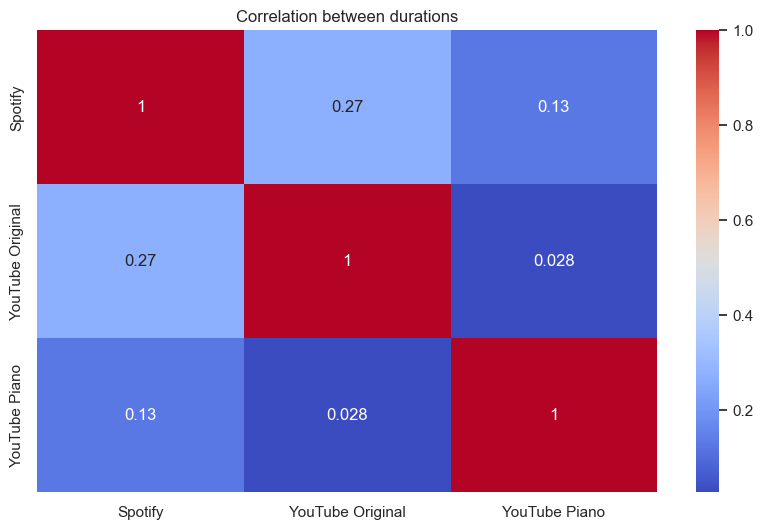

In [14]:
# Correlation between durations
plt.figure(figsize=(10, 6))
sns.heatmap(duration_comparison.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between durations')
plt.show()

Number of songs per album:


Tribalistas         9
Djavan "Ao Vivo"    8
Chico Buarque       5
O Tempo É Agora     5
ANAVITÓRIA          5
Esquinas            5
Luz                 4
Alucinacao          4
Caetano Veloso      4
Um banda um         4
Name: Album, dtype: int64

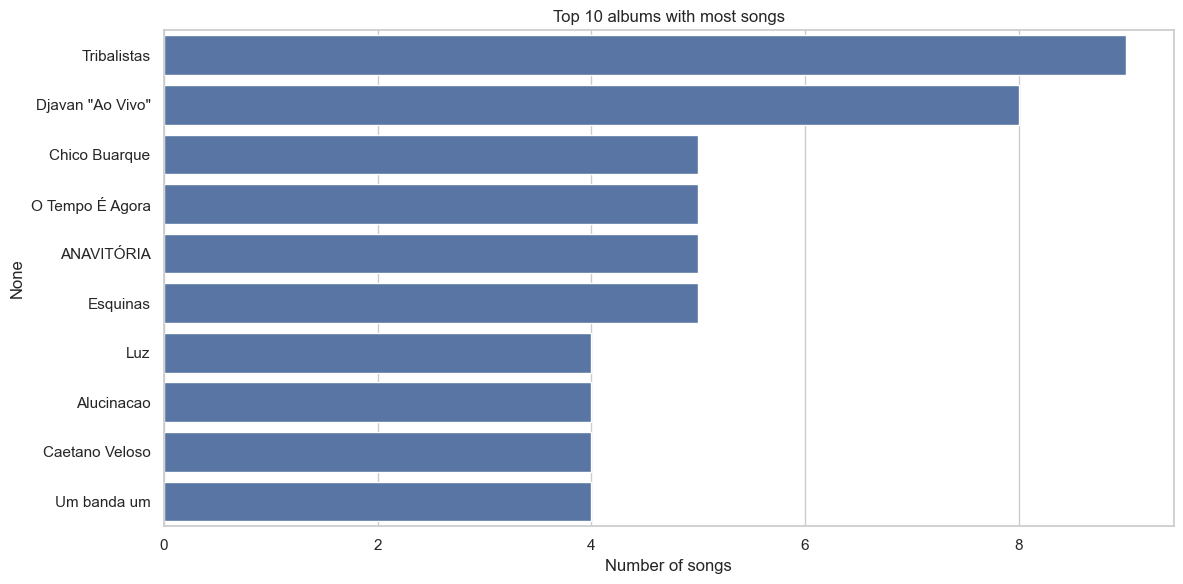

In [15]:
# Album analysis
print("Number of songs per album:")
album_counts = df['Album'].value_counts()
display(album_counts.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=album_counts.head(10).values, y=album_counts.head(10).index)
plt.title('Top 10 albums with most songs')
plt.xlabel('Number of songs')
plt.tight_layout()
plt.show()

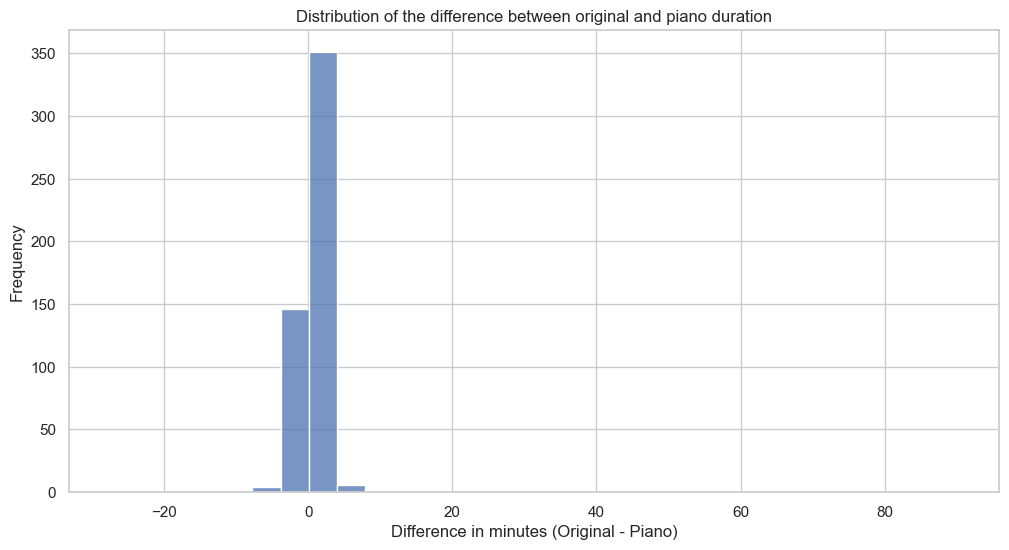

In [16]:
# Calculating differences between durations
df['Diff_Original_Piano'] = df['Original Duration (min)'] - df['Piano Duration (min)']

# Visualizing the distribution of differences
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Diff_Original_Piano', bins=30)
plt.title('Distribution of the difference between original and piano duration')
plt.xlabel('Difference in minutes (Original - Piano)')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Top 5 largest differences
display(df.nlargest(5, 'Diff_Original_Piano')[['Track Name', 'Artist', 'Original Duration (min)', 'Piano Duration (min)', 'Diff_Original_Piano']])

,Track Name,Artist,Original Duration (min),Piano Duration (min),Diff_Original_Piano
126,Carta de Amor (Ao Vivo),Maria Bethânia,93.050000,3.000000,90.050000
472,Com A Perna No Mundo,Gonzaguinha,10.866667,4.833333,6.033333
829,Quem Me Segurou Foi Deus,Nelsinho Corrêa,7.033333,1.016667,6.016667
926,Flutua,Johnny Hooker,7.416667,2.616667,4.800000
457,Meu Caro Amigo,Chico Buarque,5.733333,1.133333,4.600000


In [18]:
# Average duration by version
print(f"Spotify: {df['Spotify Duration (min)'].mean():.2f}")
print(f"YouTube Original: {df['Original Duration (min)'].mean():.2f}")
print(f"YouTube Piano: {df['Piano Duration (min)'].mean():.2f}")

Spotify: 3.82
YouTube Original: 4.10
YouTube Piano: 3.24


In [19]:
# Minimizing outliers based on the IQR method for the specified columns
def remove_duration_outliers(df, columns, n_std=1.5):
    df_clean = df.copy()
    
    for column in columns:
        # Calculating Q1, Q3 and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Defining limits for outliers
        lower_bound = Q1 - n_std * IQR
        upper_bound = Q3 + n_std * IQR
        
        # Creating mask for values within the limits
        mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)
        df_clean = df_clean[mask]
    
    return df_clean

In [20]:
# Minimizing outliers
duration_columns = ['Original Duration (min)', 'Piano Duration (min)']
df_no_outliers = remove_duration_outliers(df, duration_columns)

/var/folders/2l/dw3h_m3n5_x9ljsn9qdpxf4h0000gn/T/ipykernel_99592/3976421838.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[mask]


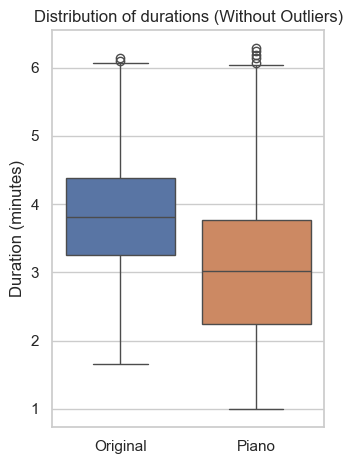

In [21]:
# Visualizing distribution after minimizing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=[df_no_outliers['Original Duration (min)'], df_no_outliers['Piano Duration (min)']])
plt.title('Distribution of durations (Without Outliers)')
plt.xticks([0, 1], ['Original', 'Piano'])
plt.ylabel('Duration (minutes)')

plt.tight_layout()
plt.show()

In [22]:
# Showing statistics
print(f"Number of original songs: {len(df)}")
print(f"Number of songs after removing outliers: {len(df_no_outliers)}")
print(f"Number of removed outliers: {len(df) - len(df_no_outliers)}")

Number of original songs: 510
Number of songs after removing outliers: 485
Number of removed outliers: 25


In [23]:
# Showing the removed songs (outliers)
outliers_mask = ~df.index.isin(df_no_outliers.index)
display(df[outliers_mask][['Track Name', 'Artist', 'Original Duration (min)', 'Piano Duration (min)']])

,Track Name,Artist,Original Duration (min),Piano Duration (min)
7,Construção,Chico Buarque,6.416667,2.733333
26,Um Amor Puro,Djavan,5.483333,9.000000
58,Mais Ninguém,Banda do Mar,2.800000,9.433333
64,Lembra de Mim - Ao Vivo,Ivan Lins,4.316667,10.866667
90,Lágrimas Negras,Gal Costa,4.050000,6.300000
123,Minto pra quem perguntar,ANAVITÓRIA,3.133333,6.750000
124,Quando Bate Aquela Saudade,Rubel,6.750000,3.066667
126,Carta de Amor (Ao Vivo),Maria Bethânia,93.050000,3.000000
133,Partilhar,Rubel,7.050000,3.983333
158,Cacador De Mim,Milton Nascimento,6.550000,2.216667


In [24]:
# Statistics of durations after removing outliers
display(df_no_outliers[duration_columns].describe())

,Original Duration (min),Piano Duration (min)
count,485.000000,485.000000
mean,3.843093,3.044364
std,0.830614,1.132806
min,1.650000,1.000000
25%,3.250000,2.250000
50%,3.816667,3.016667
75%,4.383333,3.766667
max,6.150000,6.283333


In [25]:
df_no_outliers.head()

,Track Name,Artist,Album,Release Date,Spotify Duration (ms),Spotify Track URL,YouTube Original Video URL,Original Duration,YouTube Piano Solo Video URL,Piano Solo Duration,Year,Decade,Spotify Duration (min),Original Duration (min),Piano Duration (min),Diff_Original_Piano
0,Velha Infância - 2004 Digital Remaster,Tribalistas,Tribalistas,2002-01-01,250440,https://open.spotify.com/track/1mSxbLW7fKABfeY...,https://www.youtube.com/watch?v=iyJDuJggiEM,251000,https://www.youtube.com/watch?v=YcOyefoJec0,146000.0,2002,2000,4.174000,4.183333,2.433333,1.750000
1,Trem-Bala,Ana Vilela,Trem-Bala,2017-12-05,180319,https://open.spotify.com/track/05QeyKGAn4TZrv4...,https://www.youtube.com/watch?v=sWhy1VcvvgY,181000,https://www.youtube.com/watch?v=-OswZiQeXgc,60000.0,2017,2010,3.005317,3.016667,1.000000,2.016667
2,Aliança,Tribalistas,Tribalistas,2017-01-01,237421,https://open.spotify.com/track/1DLKuppSYytOuxh...,https://www.youtube.com/watch?v=3JiMr-HgHJ8,251000,https://www.youtube.com/watch?v=I1kwd-UDuec,227000.0,2017,2010,3.957017,4.183333,3.783333,0.400000
3,O Que É O Que É?,Gonzaguinha,Caminhos Do Coração,1982-08-13,258986,https://open.spotify.com/track/2CoKGyZavJWTFUP...,https://www.youtube.com/watch?v=IYZcsb706q8,261000,https://www.youtube.com/watch?v=CruT6LdL-Uc,219000.0,1982,1980,4.316433,4.350000,3.650000,0.700000
4,A Banda,Chico Buarque,Chico Buarque de Hollanda,1966-01-01,131000,https://open.spotify.com/track/6wUp7y502iyWLuL...,https://www.youtube.com/watch?v=WZWcpEgJZAY,132000,https://www.youtube.com/watch?v=8Ba1_LfcFR0,61000.0,1966,1960,2.183333,2.200000,1.016667,1.183333


In [26]:
df_no_outliers.to_csv('dataset/playlist_metadata_clean.csv', index=False)